2. Dự đoán chiều cao dựa vào cân nặng

Dataset: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

Input: cân nặng

Output: chiều cao

Tasks:
- Visualize dữ liệu
- Xử lý outliers
- Xây dựng mô hình dự đoán
- Đánh giá độ chính xác

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("SOCR-HeightWeight.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


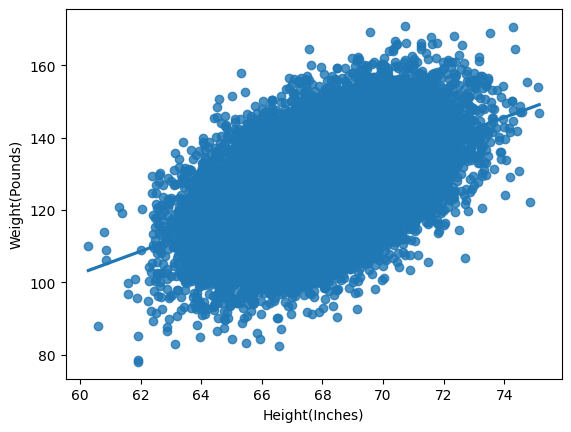

In [4]:
# data=df[["Height(Inches)", "Weight(Pounds)"]]
sns.regplot(x='Height(Inches)',y='Weight(Pounds)',data=df)
plt.show()

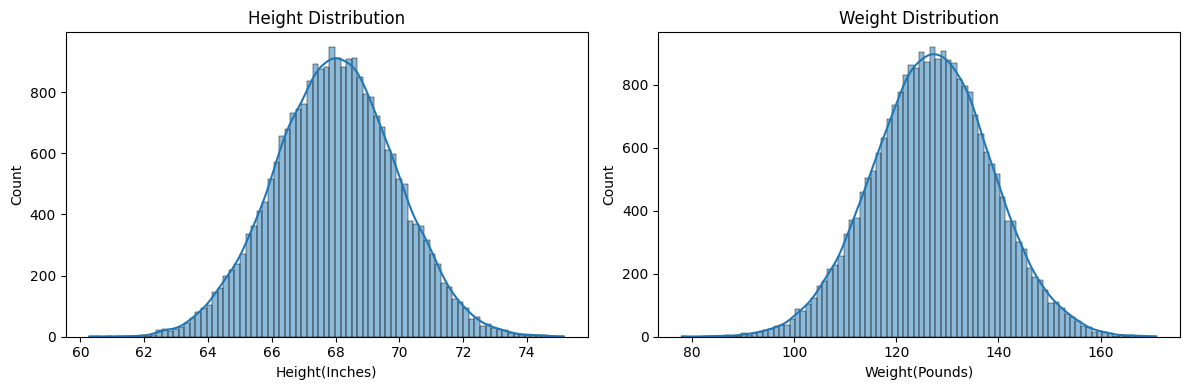

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.histplot(df['Height(Inches)'], kde= True)
plt.title("Height Distribution")

plt.subplot(122)
sns.histplot(df['Weight(Pounds)'], kde= True)
plt.title("Weight Distribution")

plt.tight_layout()
plt.show()


In [6]:
X = df['Height(Inches)'].values.reshape(-1,1)
y = df['Weight(Pounds)'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

print(f"Kết quả mô hình:")
print(f"R2 Score: {r2_score(y_test,y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test,y_pred, squared= False):.4f}")

Kết quả mô hình:
R2 Score: 0.2548
RMSE: 10.0693


c:\Users\duclp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


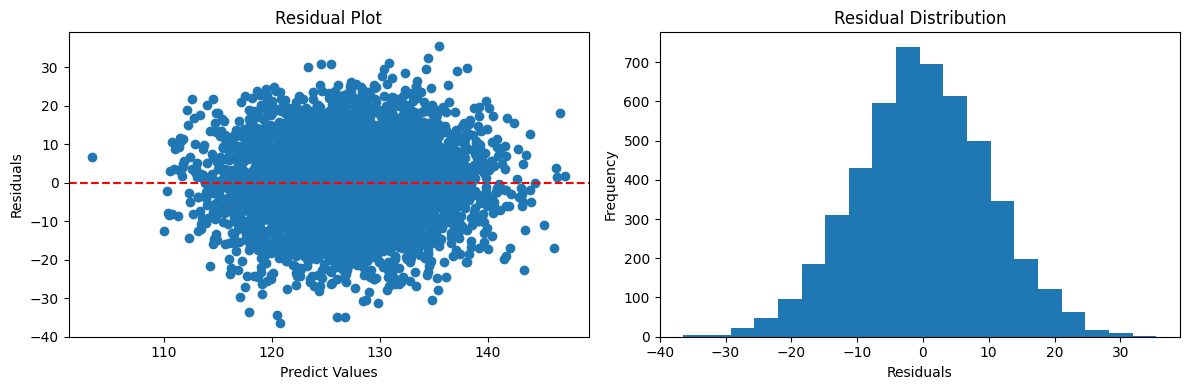

In [9]:
# Trực quan hóa lên kết quả 
residuals = y_test - y_pred

plt.figure(figsize=(12,4))
# Residual plot
plt.subplot(121)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predict Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#Histogram
plt.subplot(122)
plt.hist(residuals, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()